Multi-class classification is where each sample belongs to one of multiple categories (e.g., classifying images of cats, dogs, and birds).

✅ Handling multi-class problems in LightGBM
✅ Required parameter settings
✅ Example: Predicting handwritten digits (MNIST dataset)
✅ Model evaluation with accuracy & confusion matrix

Unlike binary classification, where we predict 0 or 1, in multi-class classification, we predict one of multiple categories.
For multi-class classification in LightGBM, we must:
Set objective="multiclass"
Define the number of classes with num_class

In [3]:
import numpy as np

import lightgbm as lgb

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
# Load dataset

digits = load_digits()

X,y = digits.data, digits.target #  # Features and target labels

In [5]:
# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Create LightGBM dataset

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

Training a MultiClass 

We specify:
✅ objective="multiclass" → Multi-class classification
✅ num_class=10 → Number of unique classes (0-9 in MNIST)
✅ metric="multi_logloss" → Log loss for multi-class problems

In [7]:
params = {

    'objective' : 'multiclass',
    'num_class' : 10,
    'metric': 'multi_logloss',
    'boosting_type ': 'gbdt',
    'learning_rate':0.1,
    'max_depth':5,
    'n_estimators':200
    
}

In [8]:
# Train LightGBM model

model = lgb.train(

    params,
    train_data,
    num_boost_round=200,
    valid_sets=[test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
        lgb.log_evaluation(period=20)
    ]

)

/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: gbdt
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=5) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Unknown parameter: gbdt
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=5) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the tr

In [9]:
# Make predictions

y_pred_prob = model.predict(X_test)  # Predict probabilities

y_pred = np.argmax(y_pred_prob,axis=1) # Convert probabilities to class labels

Evaluating the Model

We check accuracy and confusion matrix to measure performance.

In [10]:
# Compute accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9611


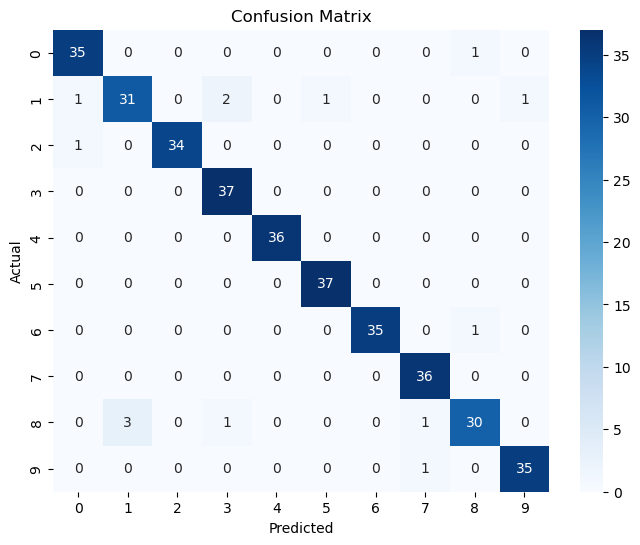

In [11]:
# Plot confusion matrix

plt.figure(figsize=(8,6))

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=range(10),yticklabels=range(10))

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title("Confusion Matrix")

plt.show()